In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import numpy as np

In [2]:
SHANNON_EXTENT = [-9, -7, 52.5, 54.25]
# SHANNON_LAKES = frozenset(["Lough Derg", "Lough Ree", "Lough Allen"])
SHANNON_LAKES = frozenset(["Lough Ree"])

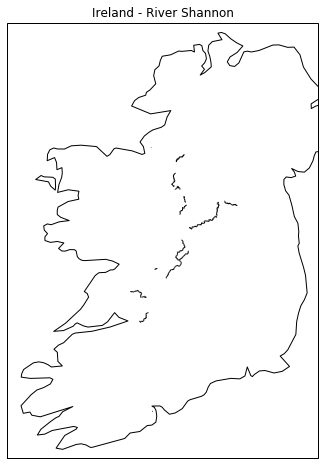

In [20]:
rivers_file = shapereader.natural_earth(
    resolution = '10m',
    category = 'physical',
    name = 'rivers_lake_centerlines_scale_rank'
)

lakes_file = shapereader.natural_earth(
    resolution = "10m",
    category = 'physical',
    name="lakes"
)

custom_shp = shapereader.Reader("/home/rbeattie/Downloads/Shapefiles/WATER_RivNetRoutes.shp")

rivers_shp = shapereader.Reader(rivers_file)
lakes_shp = shapereader.Reader(lakes_file)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(29902))

ax.set_title("Ireland - River Shannon")

# for rec in rivers_shp.records():
#     if rec.attributes['name'] == 'Shannon':
#         ax.add_geometries([rec.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none')
#     pass

# for rec in lakes_shp.records():
#     if rec.attributes['name'] in SHANNON_LAKES:
#         ax.add_geometries([rec.geometry], ccrs.PlateCarree(), edgecolor='black', facecolor='blue')

for rec in custom_shp.records():
    if "Shannon" in rec.attributes['EPA_NAME']:
        ax.add_geometries([rec.geometry], ccrs.epsg(29902), edgecolor="black", facecolor='none')

# for rec in european_rivers_shp.records():
# #     ax.add_geometries([rec.geometry], ccrs.PlateCarree(), edgecolor='black', facecolor='blue')

ax.coastlines(resolution='50m')
# ax.set_extent(SHANNON_EXTENT)


## Extracting coordiantes of the river

In [26]:
shannon_cords = []
lakes_coords = []

# for rec in rivers_shp.records():
#     if rec.attributes['name'] == 'Shannon':
#         for linestring in rec.geometry:
#             for coords in linestring.coords:
#                 shannon_cords.append(coords)
#     pass

for rec in custom_shp.records():
    if "Shannon" in rec.attributes['EPA_NAME']:
        for linestring in rec.geometry:
            for coords in linestring.coords:
                shannon_cords.append(coords)
    pass

for rec in lakes_shp.records():
    if rec.attributes['name'] in SHANNON_LAKES:
        for item in rec.geometry:
            for coords in item.boundary.coords:
                lakes_coords.append(coords)
    pass

In [27]:
boundary_river = np.array(shannon_cords)
boundary_lakes = np.array(lakes_coords)

## Plot boundary

[162000, 168000, 140000, 170000]

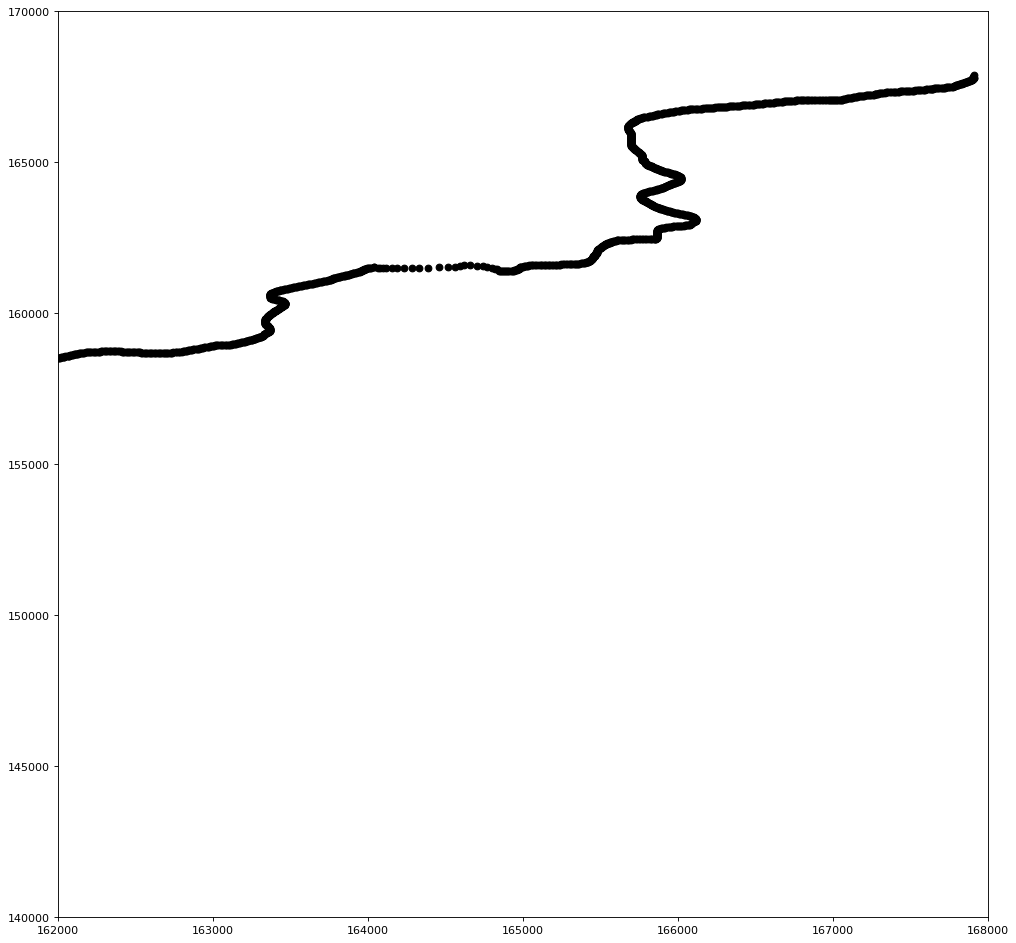

In [32]:
plt.figure(figsize=(15,15), dpi=80)
plt.plot(boundary_river[:,0], boundary_river[:,1], 'ko')
plt.axis([162000, 168000, 140000, 170000])

array([], dtype=float64)

## Creating the mesh

In [8]:
from meshpy.triangle import MeshInfo, build

In [9]:
def round_trip_connect(start, end):
    result = []
    for i in range(start, end):
        result.append((i, i+1))
    result.append((end, start))
    return result

In [10]:
mesh_info = MeshInfo()
mesh_info.set_points(boundary_river)
mesh = build(mesh_info)
# print("Mesh Points:")
# for i, p in enumerate(mesh.points):
#     print(i, p)
# print("Point numbers in tetrahedra:")
# for i, t in enumerate(mesh.elements):
#     print(i, t)

In [11]:
# pts = np.vstack(mesh.points)
# elements = np.vstack(mesh.elements) 

# plt.triplot(pts[:,0], pts[:,1], elements[:,:3])